# 1. Libraries

In [56]:
import pandas as pd
import seaborn as sns
import plotly.express as px
from copy import copy
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
import plotly.graph_objects as go

# 2. Importing Stock Data 

In [58]:
# Importing the stock data from CSV
stocks_df = pd.read_csv('stocks_data_ai.csv')
stocks_df

Date         AMD        GOOG        META        MSFT        NVDA  \
0     2017-01-03   11.430000   39.166271  116.415306   56.601124    2.512894   
1     2017-01-04   11.430000   39.204136  118.238335   56.347881    2.571523   
2     2017-01-05   11.240000   39.558861  120.210808   56.347881    2.506243   
3     2017-01-06   11.320000   40.163189  122.940384   56.836288    2.539745   
4     2017-01-09   11.490000   40.188103  124.424706   56.655384    2.642714   
...          ...         ...         ...         ...         ...         ...   
2007  2024-12-24  126.290001  197.570007  607.750000  438.450836  140.220001   
2008  2024-12-26  125.059998  197.100006  603.349976  437.233276  139.929993   
2009  2024-12-27  125.190002  194.039993  599.809998  429.668457  137.009995   
2010  2024-12-30  122.440002  192.690002  591.239990  423.979858  137.490005   
2011  2024-12-31  120.790001  190.440002  585.510010  420.656525  134.289993   

            ^GSPC  
0     2257.830078  
1     2270.750000  
2     2269.000000  
3     2276.979980  
4     2268.899902  
...           ...  
2007  6040.040039  
2008  6037.589844  
2009  5970.839844  
2010  5906.939941  
2011  5881.629883  

[2012 rows x 7 columns]

In [60]:
# Make sure the columns are right and there are no NA values
stocks_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2012 entries, 0 to 2011
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2012 non-null   object 
 1   AMD     2012 non-null   float64
 2   GOOG    2012 non-null   float64
 3   META    2012 non-null   float64
 4   MSFT    2012 non-null   float64
 5   NVDA    2012 non-null   float64
 6   ^GSPC   2012 non-null   float64
dtypes: float64(6), object(1)
memory usage: 110.2+ KB


In [62]:
# Check some statistical content of the whole data
stocks_df.describe()

AMD         GOOG         META         MSFT         NVDA  \
count  2012.000000  2012.000000  2012.000000  2012.000000  2012.000000   
mean     72.253211    94.789856   251.304691   215.877651    25.760817   
std      49.855905    41.366312   118.098537   115.104031    34.392974   
min       9.530000    39.166271    88.571671    56.347881     2.355250   
25%      23.702499    56.761677   169.624546   103.394800     5.194824   
50%      76.365002    87.981873   201.440521   214.496513    13.136081   
75%     106.599997   131.046642   309.423035   296.082970    26.519885   
max     211.380005   198.160004   632.170044   464.854340   148.869751   

             ^GSPC  
count  2012.000000  
mean   3676.326670  
std     977.475589  
min    2237.399902  
25%    2798.342590  
50%    3678.189941  
75%    4382.112549  
max    6090.270020

# 3. DATA SCALING

In [65]:
stocks_df.columns[1:]

Index(['AMD', 'GOOG', 'META', 'MSFT', 'NVDA', '^GSPC'], dtype='object')

In [67]:
# Function to normalise prices based on initial price for a dataframe
def normalize(df):
    x = df.copy()
    for i in x.columns[1:]:
        x[i] = x[i]/x[i][0]
    return x

In [69]:
# Applying the function to our DF
normalize(stocks_df)

Date        AMD      GOOG      META      MSFT       NVDA     ^GSPC
0     2017-01-03   1.000000  1.000000  1.000000  1.000000   1.000000  1.000000
1     2017-01-04   1.000000  1.000967  1.015660  0.995526   1.023331  1.005722
2     2017-01-05   0.983377  1.010024  1.032603  0.995526   0.997353  1.004947
3     2017-01-06   0.990376  1.025453  1.056050  1.004155   1.010685  1.008482
4     2017-01-09   1.005249  1.026090  1.068800  1.000959   1.051661  1.004903
...          ...        ...       ...       ...       ...        ...       ...
2007  2024-12-24  11.048994  5.044392  5.220533  7.746327  55.800197  2.675153
2008  2024-12-26  10.941382  5.032391  5.182738  7.724816  55.684788  2.674067
2009  2024-12-27  10.952756  4.954263  5.152329  7.591165  54.522783  2.644504
2010  2024-12-30  10.712161  4.919794  5.078714  7.490661  54.713802  2.616202
2011  2024-12-31  10.567804  4.862347  5.029493  7.431947  53.440365  2.604992

[2012 rows x 7 columns]

# DATA VISUALIZATION

In [72]:
def interactive_plot(df, title):
    fig = px.line(title = title)
    for i in df.columns[1:]:
        fig.add_scatter(x = df['Date'], y = df[i], name = i)
    fig.show()

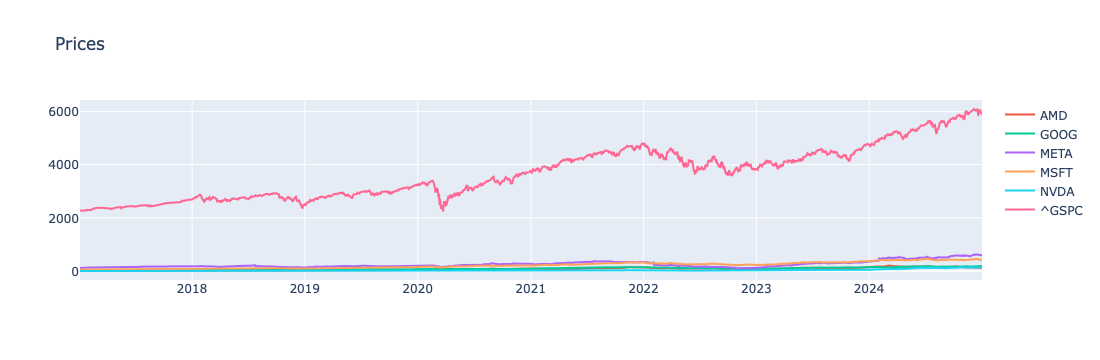

In [74]:
interactive_plot(stocks_df, 'Prices')

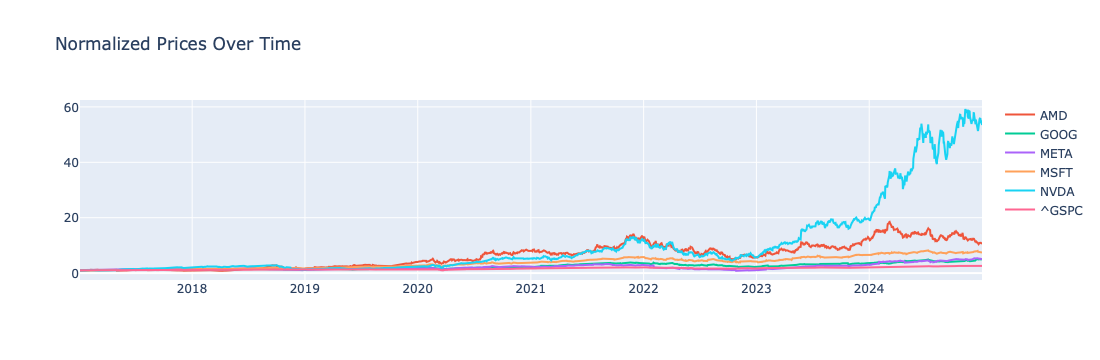

In [76]:
interactive_plot(normalize(stocks_df), 'Normalized Prices Over Time')

# Function to Calculate Daily Returns

In [16]:
stocks_df

Date         AMD        GOOG        META        MSFT        NVDA  \
0     2017-01-03   11.430000   39.166271  116.415306   56.601124    2.512894   
1     2017-01-04   11.430000   39.204136  118.238335   56.347881    2.571523   
2     2017-01-05   11.240000   39.558861  120.210808   56.347881    2.506243   
3     2017-01-06   11.320000   40.163189  122.940384   56.836288    2.539745   
4     2017-01-09   11.490000   40.188103  124.424706   56.655384    2.642714   
...          ...         ...         ...         ...         ...         ...   
2007  2024-12-24  126.290001  197.570007  607.750000  438.450836  140.220001   
2008  2024-12-26  125.059998  197.100006  603.349976  437.233276  139.929993   
2009  2024-12-27  125.190002  194.039993  599.809998  429.668457  137.009995   
2010  2024-12-30  122.440002  192.690002  591.239990  423.979858  137.490005   
2011  2024-12-31  120.790001  190.440002  585.510010  420.656525  134.289993   

            ^GSPC  
0     2257.830078  
1     2270.750000  
2     2269.000000  
3     2276.979980  
4     2268.899902  
...           ...  
2007  6040.040039  
2008  6037.589844  
2009  5970.839844  
2010  5906.939941  
2011  5881.629883  

[2012 rows x 7 columns]

In [79]:
#Defining The Function

def daily_return(df):
    df_daily_return = df.copy()
    
    for i in df.columns[1:]:
        for j in range(1, len(df)):
            df_daily_return[i][j] = ((df[i][j] - df[i][j-1]) / df[i][j-1]) * 100
        
        df_daily_return[i][0]=0
    return df_daily_return

In [81]:
# Applying the Function to our DF

stocks_daily_return = daily_return(stocks_df)
print(stocks_daily_return.info())


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2012 entries, 0 to 2011
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2012 non-null   object 
 1   AMD     2012 non-null   float64
 2   GOOG    2012 non-null   float64
 3   META    2012 non-null   float64
 4   MSFT    2012 non-null   float64
 5   NVDA    2012 non-null   float64
 6   ^GSPC   2012 non-null   float64
dtypes: float64(6), object(1)
memory usage: 110.2+ KB
None


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



# CALCULATE BETA FOR A STOCK (NVDA)

In [85]:
# Calculating Beta for 1 stock first (NVDA)

stocks_daily_return['NVDA']

0       0.000000
1       2.333099
2      -2.538554
3       1.336746
4       4.054292
          ...   
2007    0.393788
2008   -0.206824
2009   -2.086756
2010    0.350347
2011   -2.327451
Name: NVDA, Length: 2012, dtype: float64

In [87]:
stocks_daily_return['^GSPC'] # (S&P500)

0       0.000000
1       0.572227
2      -0.077067
3       0.351696
4      -0.354859
          ...   
2007    1.104276
2008   -0.040566
2009   -1.105574
2010   -1.070200
2011   -0.428480
Name: ^GSPC, Length: 2012, dtype: float64

<Axes: xlabel='^GSPC', ylabel='NVDA'>

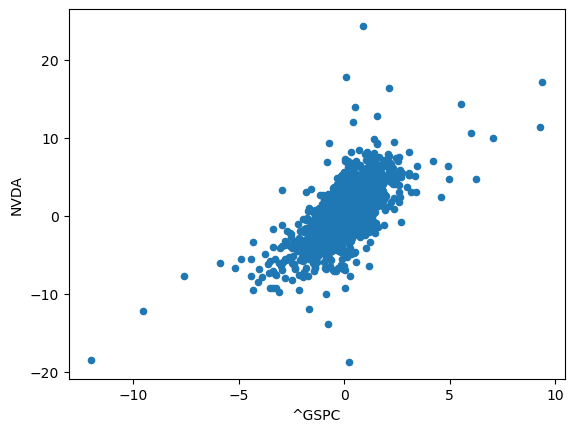

In [89]:
stocks_daily_return.plot(kind = 'scatter', x = '^GSPC' , y = 'NVDA')

In [23]:
beta_nvda, alpha = np.polyfit(stocks_daily_return['^GSPC'], stocks_daily_return['NVDA'], 1)
print('Beta for {} stock is = {} and Alpha is = {}'.format('NVDA', beta_nvda, alpha))

Beta for NVDA stock is = 1.8109915901366769 and Alpha is = 0.14915193662676646


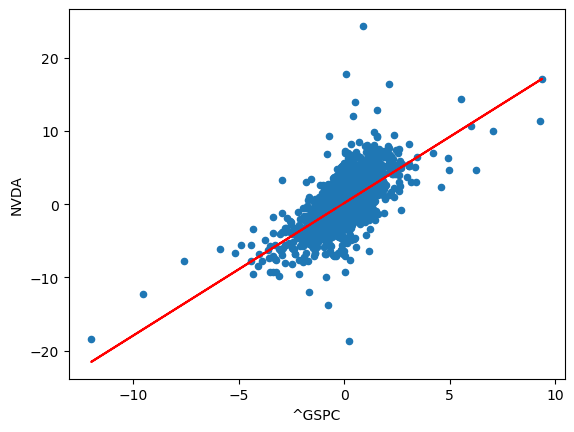

In [91]:
# Scatter plot and straight line on plot

stocks_daily_return.plot(kind = 'scatter', x = '^GSPC', y = 'NVDA')

# Straight Line equation with alpha and beta parameters 
# Straight Line equation is 'y = beta * rm + alpha'

plt.plot(stocks_daily_return['^GSPC'], beta_nvda * stocks_daily_return['^GSPC'] + alpha, '-', color ='r')

# The line is the best fit line that goes with the data

# APPLY THE CAPM FORMULA TO AN INDIVIDUAL STOCK (NVDA)

In [93]:
# BETA of stock we have selected (NVDA)

beta_nvda

1.8109915901366769

In [95]:
# Calculate Average Daily Rate of Return for S7P500

stocks_daily_return['^GSPC'].mean()

0.0544895708014977

In [97]:
# Calculate the annualized rate of return for S&P500

# Note that for 365 days/year, stock exchanges are closed for 104 days during weekend days

rm = stocks_daily_return['^GSPC'].mean() * 252
rm

13.73137184197742

In [99]:
# We need the RISK FREE RATE ( Using 10 year U.S Govt Bond as Risk free rate)

rf = 0.0429

ER_NVDA = rf + (beta_nvda * (rm-rf))

In [101]:
# Expected Return (ER) of Stock (NVDA) 

ER_NVDA

24.832607387643815

# CALCULATE BETA FOR ALL THE STOCKS IN LIST

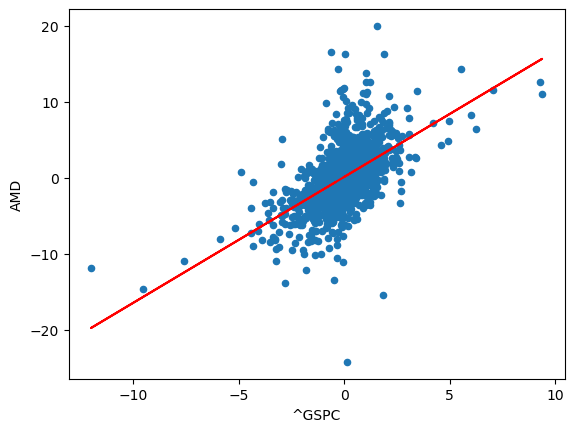

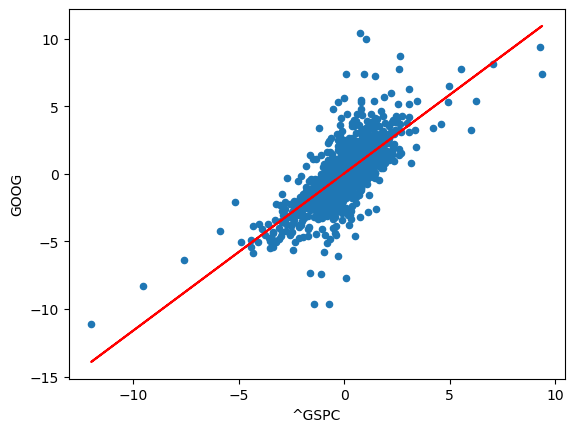

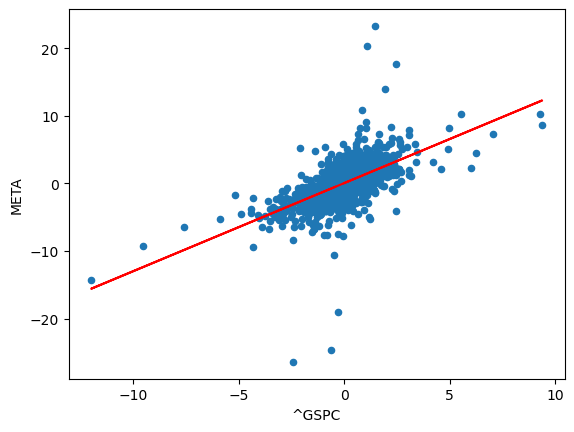

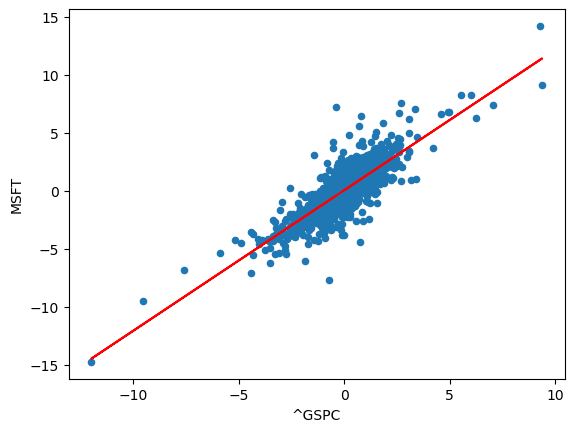

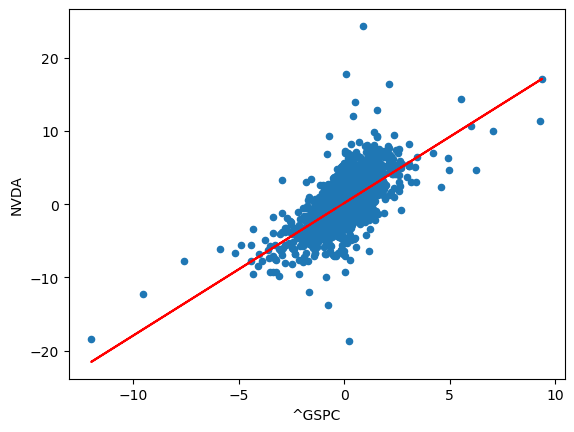

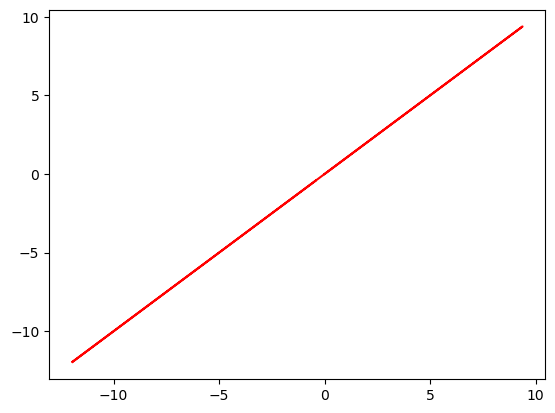

In [106]:
beta = {}
alpha = {}

#Loop on every stock daily returns
for i in stocks_daily_return.columns[1:]:

    # Ignoring Date and S&P500 columns
    if i != 'Date' and i != '^GSPC':
        # Plot a scatter plot btw each stock and the S&P500 (Market)
        stocks_daily_return.plot(kind = 'scatter', x = '^GSPC', y = i)

    # Fit a polynomial between each stock and the S&P500 (Poly with order = 1 is a straight line)
    b, a = np.polyfit(stocks_daily_return['^GSPC'], stocks_daily_return[i], 1)

    plt.plot(stocks_daily_return['^GSPC'], b * stocks_daily_return['^GSPC'] + a, '-', color = 'r')

    beta[i] = b

    alpha[i] = a

    plt.show()

In [ ]:
# To plot the same thing in an Interactive way using Plotly.express (px)

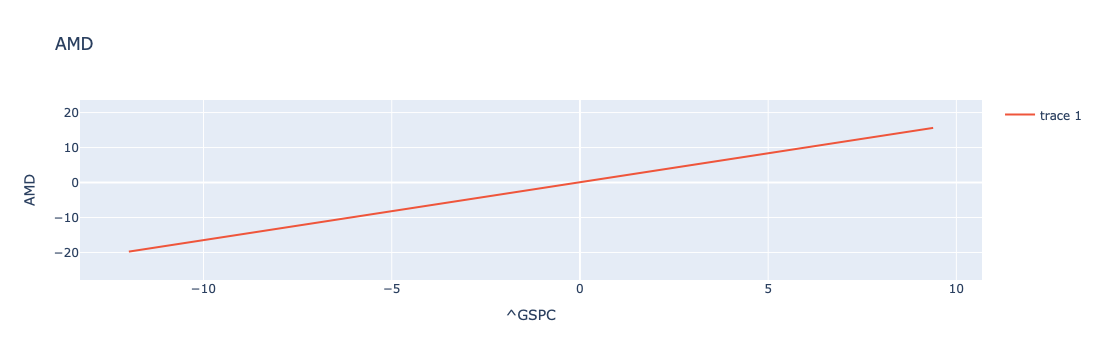

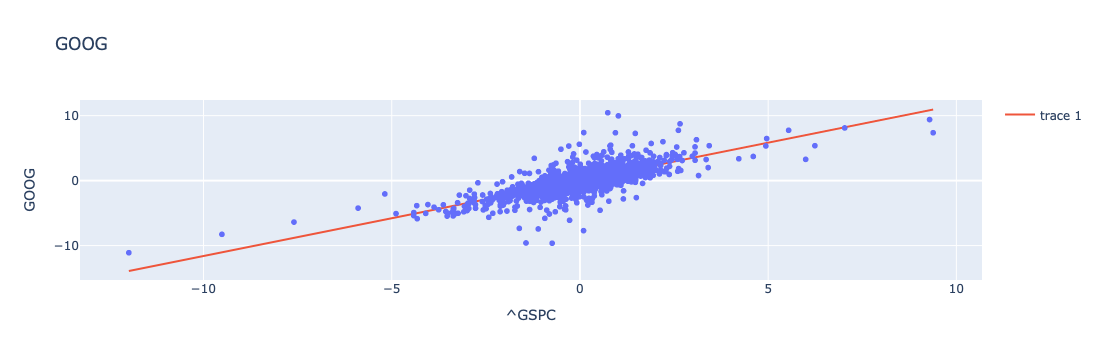

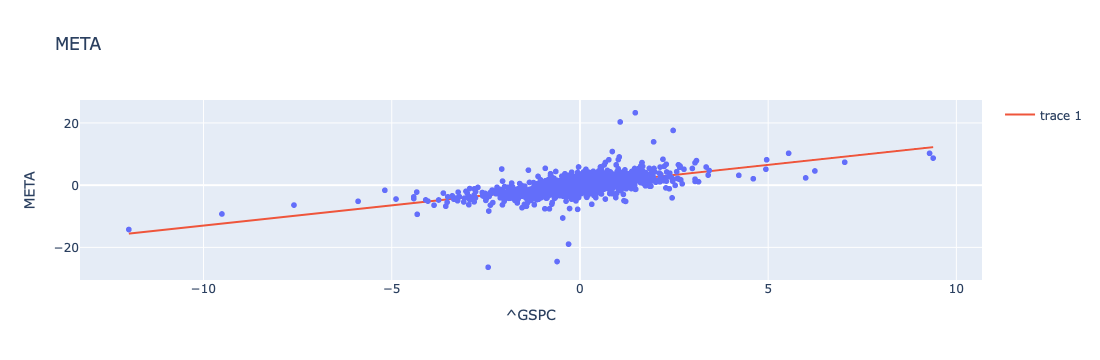

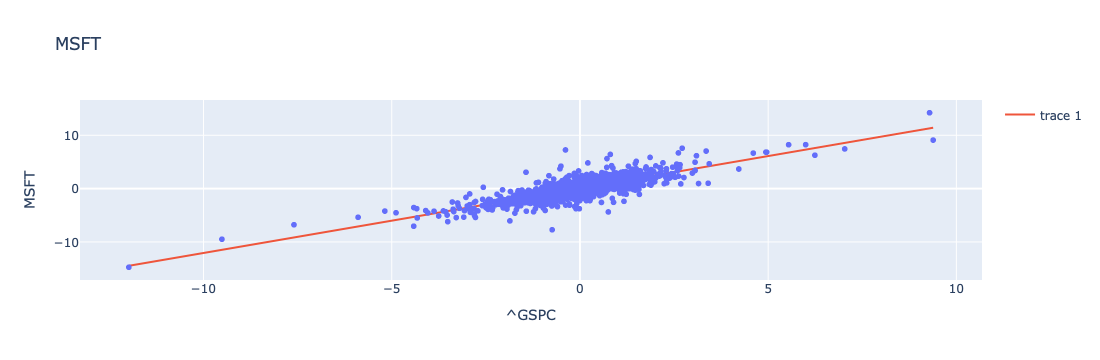

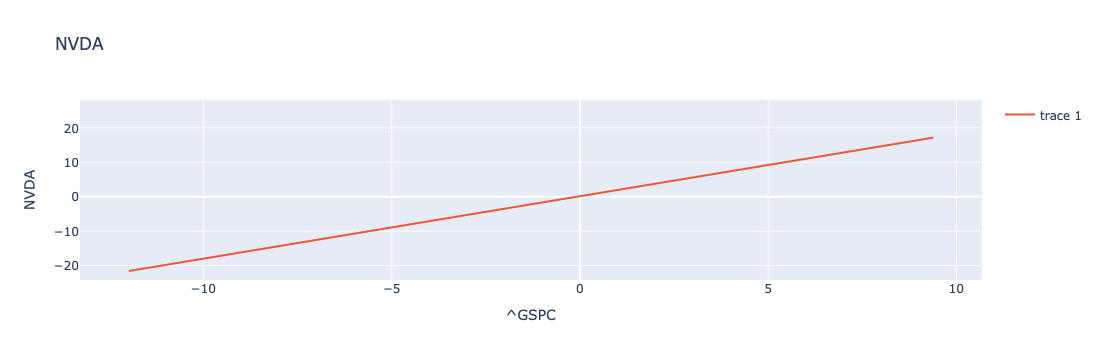

In [108]:
for i in stocks_daily_return.columns[1:]:
    
    if i != 'Date' and i != '^GSPC':
        
        # Use Plotly express to plot the scatter plot for every stock vs the S&P500
        
        fig = px.scatter(stocks_daily_return, x = '^GSPC', y = i, title = i)

        # Fit a straight line to the data and obtain beta and alpha
        b, a = np.polyfit(stocks_daily_return['^GSPC'], stocks_daily_return[i], 1)

        # Plot the Straight line
        fig.add_scatter(x = stocks_daily_return['^GSPC'], y = b*stocks_daily_return['^GSPC'] + a)
        fig.show()

# Now we have the beta for all stocks in list

In [110]:
beta

{'AMD': 1.6557219277583106,
 'GOOG': 1.1636231312322933,
 'META': 1.302720781002383,
 'MSFT': 1.2113380373150482,
 'NVDA': 1.8109915901366769,
 '^GSPC': 0.999999999999999}

# Compare AI Stocks vs. S&P 500: Cumulative Performance

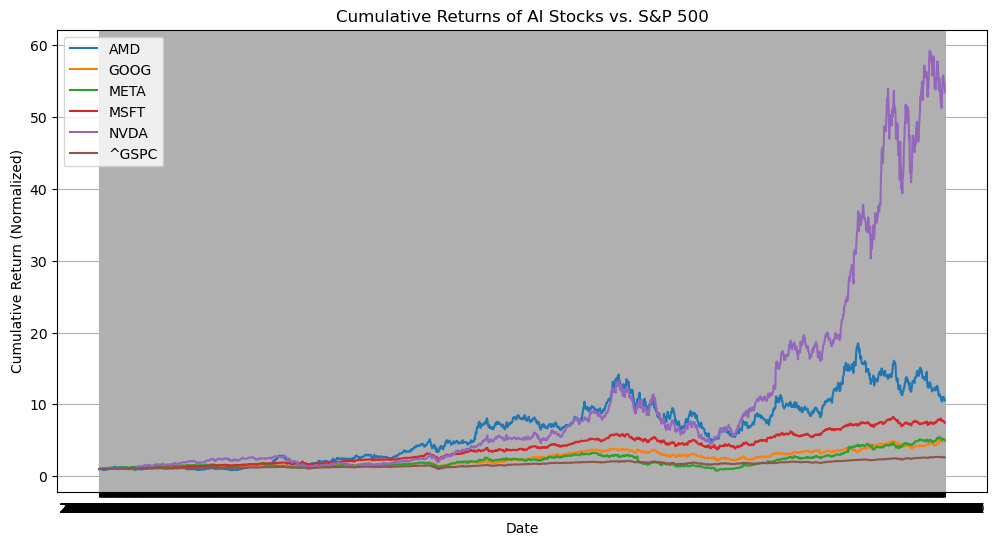

In [112]:
# Calculate cumulative returns
normalized_df = normalize(stocks_df)  # Using your existing normalization function

# Plot cumulative returns of AI stocks vs. S&P 500
plt.figure(figsize=(12, 6))
for col in normalized_df.columns[1:]: 
    plt.plot(normalized_df['Date'], normalized_df[col], label=col)

plt.title("Cumulative Returns of AI Stocks vs. S&P 500")
plt.xlabel("Date")
plt.ylabel("Cumulative Return (Normalized)")
plt.legend()
plt.grid()
plt.show()


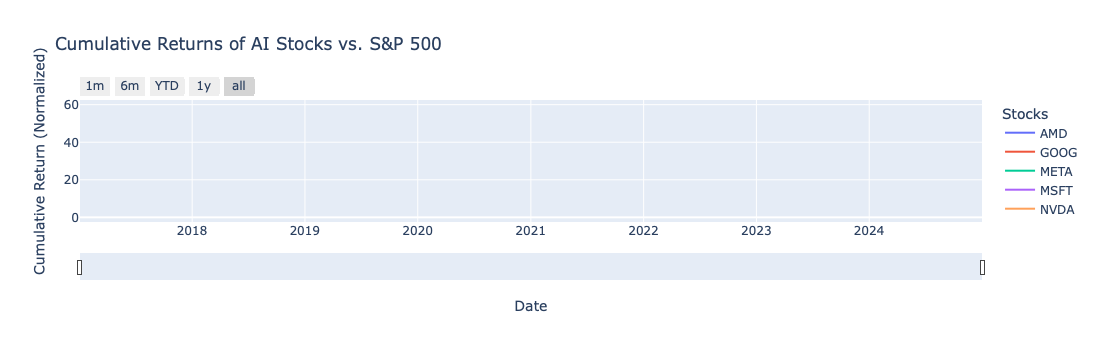

<H1> <title>  Expected vs. Actual Returns: Alpha Calculation </title> </H1> `

<h1> style="font-size: 36px;">Your Big Heading</h1>

In [116]:
# Convert beta dictionary to a Pandas Series (if not already)
beta_values = pd.Series(beta)

# Risk-free rate assumption
risk_free_rate = 0.0429 

In [118]:
# Dropping Date column to make sure only numeric is used
stocks_numeric = stocks_daily_return.drop(columns=['Date'])

# Calculate Actual Annualized Return for each stock
actual_returns = stocks_numeric.mean() * 252  # Mean daily return * 252 trading days

# Ensure '^GSPC' exists in actual_returns
sp500_return = actual_returns.get('^GSPC')
if sp500_return is None:
    raise ValueError("Error: '^GSPC' not found in actual_returns. Check column names.")

# Compute Expected Return using CAPM
expected_returns = risk_free_rate + (beta_values.reindex(actual_returns.index) * (sp500_return - risk_free_rate))

# Calculate Alpha (Actual Return - Expected CAPM Return)
alpha_values = actual_returns - expected_returns

# Create DataFrame for Alpha values
alpha_df = pd.DataFrame({
    'Actual Return': actual_returns,
    'Expected Return (CAPM)': expected_returns,
    'Alpha': alpha_values
})

# Print Summary
print("\nAlpha values for AI stocks:")
print(alpha_df.to_string())  # Ensures full table prints without truncation



Alpha values for AI stocks:
       Actual Return  Expected Return (CAPM)         Alpha
AMD        44.558256               22.707203  2.185105e+01
GOOG       24.099781               15.971122  8.128659e+00
META       28.220508               17.875157  1.034535e+01
MSFT       28.920208               16.624267  1.229594e+01
NVDA       62.453687               24.832607  3.762108e+01
^GSPC      13.731372               13.731372  1.421085e-14


In [120]:
beta

{'AMD': 1.6557219277583106,
 'GOOG': 1.1636231312322933,
 'META': 1.302720781002383,
 'MSFT': 1.2113380373150482,
 'NVDA': 1.8109915901366769,
 '^GSPC': 0.999999999999999}

In [122]:
# Drop 'Date' column if present
stocks_numeric = stocks_daily_return.drop(columns=['Date'])

# Compute daily standard deviation for each stock
daily_std_dev = stocks_numeric.std()

# Compute Sharpe Ratio
sharpe_ratios = ((actual_returns / 252) - (risk_free_rate / 252)) / daily_std_dev * np.sqrt(252)

# Create a DataFrame for Sharpe Ratios
sharpe_df = pd.DataFrame({'Sharpe Ratio': sharpe_ratios})

# Print the Sharpe Ratios
print("\nSharpe Ratios for AI stocks and S&P 500")
print(sharpe_df.to_string()) 



Sharpe Ratios for AI stocks and S&P 500
       Sharpe Ratio
AMD        0.811909
GOOG       0.822071
META       0.710229
MSFT       1.049491
NVDA       1.242204
^GSPC      0.736112


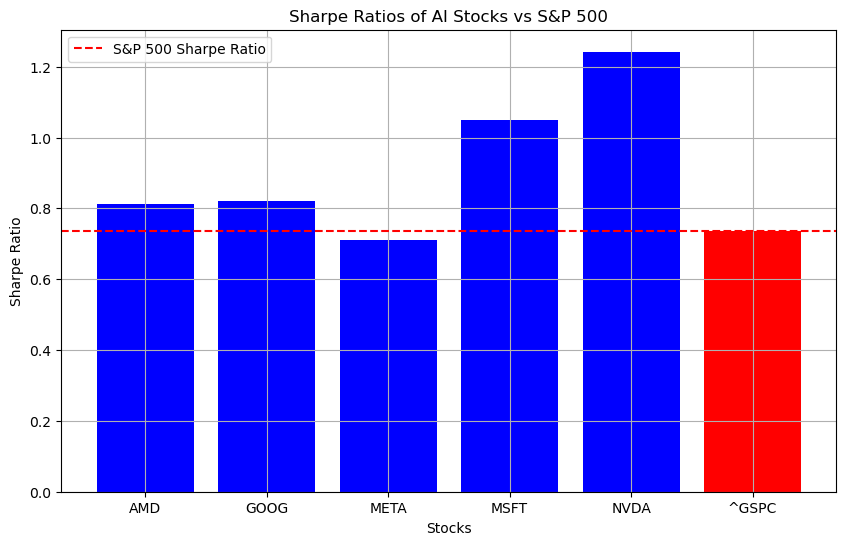

In [124]:
# Sharpe Ratio visualized w Bar chart
plt.figure(figsize=(10,6))
plt.bar(sharpe_df.index, sharpe_df['Sharpe Ratio'], color=['blue' if stock != '^GSPC' else 'red' for stock in sharpe_df.index])
plt.axhline(y=sharpe_df.loc['^GSPC', 'Sharpe Ratio'], color='red', linestyle='--', label="S&P 500 Sharpe Ratio")
plt.xlabel('Stocks')
plt.ylabel('Sharpe Ratio')
plt.title('Sharpe Ratios of AI Stocks vs S&P 500')
plt.legend()
plt.grid()
plt.show()